<a href="https://colab.research.google.com/github/MasaakiMiyazaki/pythonpractice/blob/master/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC%E5%9B%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/stock1.csv', encoding="shift-jis", dtype = None, delimiter = ",", parse_dates=['日付'])#, index_col='日付')#,data_parser=dateparse)

In [0]:
df

,日付,始値,高値,安値,終値,出来高,終値調整値,インデックス
0,2017-01-04,2734,2755,2730,2742,31400,2742,0
1,2017-01-05,2743,2747,2735,2738,17900,2738,1
2,2017-01-06,2734,2744,2720,2740,19900,2740,2
3,2017-01-10,2745,2754,2735,2748,24200,2748,3
4,2017-01-11,2748,2752,2737,2745,9300,2745,4
...,...,...,...,...,...,...,...,...
241,2017-12-25,4220,4295,4215,4275,53400,4275,241
242,2017-12-26,4300,4415,4300,4345,75200,4345,242
243,2017-12-27,4385,4400,4250,4270,58200,4270,243
244,2017-12-28,4270,4325,4230,4310,58100,4310,244


In [0]:
x=df['インデックス']
y=df['終値']

In [0]:
print(x.shape)
print(y.shape)

(246,)
(246,)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

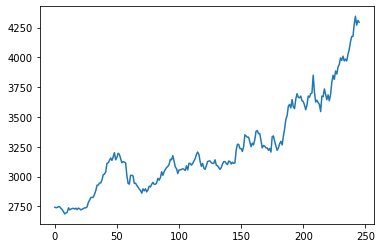

In [0]:
plt.plot (x,y)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
x.head()

0    0
1    1
2    2
3    3
4    4
Name: インデックス, dtype: int64

In [0]:
y.head()

0    2742
1    2738
2    2740
3    2748
4    2745
Name: 終値, dtype: int64

In [0]:
X=df[['インデックス']].values
y=df['終値'].values

In [0]:
double=PolynomialFeatures(degree=2)
triple=PolynomialFeatures(degree=3)

In [0]:
X2=double.fit_transform(X)
X3=triple.fit_transform(X)

In [0]:
from sklearn.metrics import r2_score

In [0]:
lr=LinearRegression()

In [0]:
lr.fit(X2,y)
y_double_fit=lr.predict(double.fit_transform(X))
double_r2=r2_score(y,y_double_fit)

In [0]:
print(double_r2)

0.8984690413652471


In [0]:
lr.fit(X3,y)
y_triple_fit=lr.predict(triple.fit_transform(X))
triple_r2=r2_score(y,y_triple_fit)

In [0]:
print(triple_r2)

0.9425758518898091


In [0]:
#三次元の方が精度高いけど二次関数の時点で高すぎ。

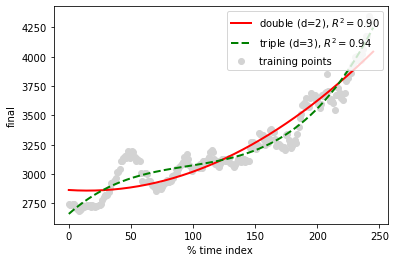

In [0]:
# 元のグラフをプロットする
plt.scatter(X, y, label='training points', color='lightgray')


plt.plot(X, y_double_fit, 
         label='double (d=2), $R^2=%.2f$' % double_r2,# 二次多項式回帰の場合の決定係数
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X, y_triple_fit, 
         label='triple (d=3), $R^2=%.2f$' % triple_r2,#三次多項式回帰の場合の決定係数
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% time index ')
plt.ylabel('final')
plt.legend(loc='upper right')
plt.show()